# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [3]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 

    
    # Population mean 

    # Sample mean (x̄) using NumPy mean()

    # Sample Standard Deviation (sigma) using Numpy
    
    # Degrees of freedom
    
    # Calculate the critical t-value
    
    # Calculate the t-value and p-value      
    
    # return results
    return None

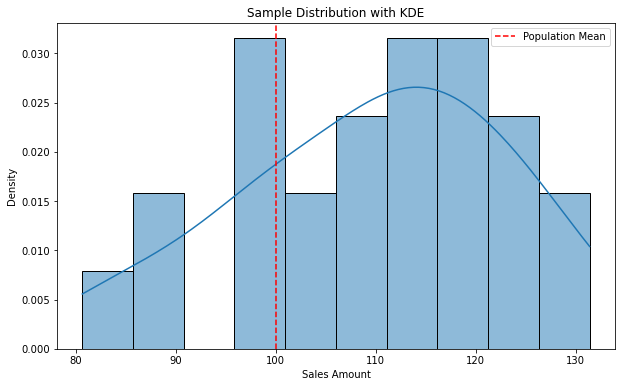

Sample Mean: 109.55
Sample Standard Deviation: 13.34
T-Statistic: 3.58
Critical T-Value: 1.71
P-Value: 0.0008
Result is significant: Reject the null hypothesis.


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def one_sample_ttest(sample, popmean, alpha):
    # Visualize sample distribution for normality
    plt.figure(figsize=(10, 6))
    sns.histplot(sample, kde=True, stat="density", bins=10)
    plt.axvline(popmean, color='red', linestyle='--', label='Population Mean')
    plt.title('Sample Distribution with KDE')
    plt.xlabel('Sales Amount')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Population mean
    # (Already provided as an argument)

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation

    # Degrees of freedom
    df = len(sample) - 1

    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha, df)

    # Calculate the t-value
    t_statistic = (sample_mean - popmean) / (sample_std / np.sqrt(len(sample)))

    # Calculate the p-value
    p_value = stats.t.sf(np.abs(t_statistic), df)  # One-tailed test

    # Return results
    return {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_statistic': t_statistic,
        'critical_t': critical_t,
        'p_value': p_value,
        'significant': p_value < alpha
    }

# Example usage
sales_data = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  
                       96.47, 111.4 ,  80.66, 110.77, 111.14, 
                       102.9, 114.54,  88.09,  98.59,  87.07, 
                       110.43, 101.9 , 123.89,  97.03, 116.23, 
                       108.3, 112.82, 119.57, 131.38, 128.39])

# Call the function with the sample data, population mean, and alpha level
results = one_sample_ttest(sales_data, popmean=100, alpha=0.05)

# Print the results
print(f"Sample Mean: {results['sample_mean']:.2f}")
print(f"Sample Standard Deviation: {results['sample_std']:.2f}")
print(f"T-Statistic: {results['t_statistic']:.2f}")
print(f"Critical T-Value: {results['critical_t']:.2f}")
print(f"P-Value: {results['p_value']:.4f}")
print("Result is significant: Reject the null hypothesis." if results['significant'] else "Result is not significant: Fail to reject the null hypothesis.")

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [5]:
import numpy as np
from scipy import stats

# Define the one_sample_ttest function (from previous implementation)
def one_sample_ttest(sample, popmean, alpha):
    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation

    # Degrees of freedom
    df = len(sample) - 1

    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha, df)

    # Calculate the t-value
    t_statistic = (sample_mean - popmean) / (sample_std / np.sqrt(len(sample)))

    # Calculate the p-value
    p_value = stats.t.sf(np.abs(t_statistic), df)  # One-tailed test

    # Return results
    return {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_statistic': t_statistic,
        'critical_t': critical_t,
        'p_value': p_value,
        'significant': p_value < alpha
    }

# Sample scores of students who took the online course
scores = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                   78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

# Population mean
popmean = 65
alpha = 0.05

# 1. Test the original sample
results_original = one_sample_ttest(scores, popmean, alpha)

# Print the results for the original sample
print("Original Sample Results:")
print(f"Sample Mean: {results_original['sample_mean']:.2f}")
print(f"Sample Standard Deviation: {results_original['sample_std']:.2f}")
print(f"T-Statistic: {results_original['t_statistic']:.2f}")
print(f"Critical T-Value: {results_original['critical_t']:.2f}")
print(f"P-Value: {results_original['p_value']:.4f}")
print("Result is significant: Reject the null hypothesis." if results_original['significant'] else "Result is not significant: Fail to reject the null hypothesis.")

# 2. Correct the score from 90.9 to 80.9
corrected_scores = scores.copy()
corrected_scores[6] = 80.9  # Change the score

# Test the corrected sample
results_corrected = one_sample_ttest(corrected_scores, popmean, alpha)

# Print the results for the corrected sample
print("\nCorrected Sample Results:")
print(f"Sample Mean: {results_corrected['sample_mean']:.2f}")
print(f"Sample Standard Deviation: {results_corrected['sample_std']:.2f}")
print(f"T-Statistic: {results_corrected['t_statistic']:.2f}")
print(f"Critical T-Value: {results_corrected['critical_t']:.2f}")
print(f"P-Value: {results_corrected['p_value']:.4f}")
print("Result is significant: Reject the null hypothesis." if results_corrected['significant'] else "Result is not significant: Fail to reject the null hypothesis.")

# Bonus: Calculate effect size (Cohen's d) for the original sample
effect_size = (results_original['sample_mean'] - popmean) / results_original['sample_std']
print(f"\nEffect Size (Cohen's d): {effect_size:.2f}")


Original Sample Results:
Sample Mean: 81.80
Sample Standard Deviation: 5.92
T-Statistic: 12.69
Critical T-Value: 1.73
P-Value: 0.0000
Result is significant: Reject the null hypothesis.

Corrected Sample Results:
Sample Mean: 81.30
Sample Standard Deviation: 5.52
T-Statistic: 13.20
Critical T-Value: 1.73
P-Value: 0.0000
Result is significant: Reject the null hypothesis.

Effect Size (Cohen's d): 2.84


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 